In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
%pwd

'/Users/trinidadbosch/Desktop/SEDS/Tesis/Data/MA-Thesis/Media Cloud/scripts'

In [2]:
news = pd.read_csv('/Users/trinidadbosch/Desktop/SEDS/Tesis/Data/MA-Thesis/Media Cloud/Data/scraped_news.csv')
urls = pd.read_pickle('/Users/trinidadbosch/Desktop/SEDS/Tesis/Data/MA-Thesis/Media Cloud/Data/media_urls.pkl')

In [3]:
news.head()
urls.head()

,ap_syndicated,collect_date,feeds,guid,language,media_id,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count
0,False,2021-02-01 11:29:05.575011,NaN,https://news.mongabay.com/2021/02/eye-in-the-s...,en,19317,Mongabay,https://news.mongabay.com/,"{'date_guess_method': None, 'extractor_version...",2248100280,2021-02-01 03:11:18,1838925040,[],Eye in the Sky: Tech makes satellite imagery i...,https://news.mongabay.com/2021/02/eye-in-the-s...,NaN
1,False,2021-02-01 13:30:32.746109,NaN,106833338,en,1755,CNBC,http://www.cnbc.com/,"{'date_guess_method': None, 'extractor_version...",2248130305,2021-02-01 13:28:31,1839017422,[],"Amazon, Alphabet and Salesforce are all invest...",https://www.cnbc.com/2021/02/01/amazon-alphabe...,NaN
2,False,2021-02-01 13:24:21.419836,NaN,19412429 at https://www.benzinga.com,en,22041,Benzinga,http://www.benzinga.com,"{'date_guess_method': None, 'extractor_version...",2248176595,2021-02-01 13:17:36,1839009079,[],15 Big Ideas In 'Disruptive Innovation' Accord...,http://feeds.benzinga.com/~r/benzinga/~3/JWduJ...,NaN
3,False,2021-02-01 11:22:41.615668,NaN,https://eurweb.com/?p=873530,en,25336,eurweb,http://www.eurweb.com,"{'date_guess_method': None, 'extractor_version...",2248202709,2021-02-01 02:05:19,1838767296,[],Black Creators At Sundance 2021,https://eurweb.com/2021/01/31/black-creators-a...,NaN
4,False,2021-02-01 14:26:32.665619,NaN,19427358 at https://www.benzinga.com,en,22041,Benzinga,http://www.benzinga.com,"{'date_guess_method': None, 'extractor_version...",2248281055,2021-02-01 14:07:26,1839090241,[],Why Bill.com's Stock Is Trading Higher Today,http://feeds.benzinga.com/~r/benzinga/~3/y-hmu...,NaN


---
## Looking for sites that blockes scraping
    Body column with Nan means that the scrape was not successful

In [26]:
# Filter rows where 'Body' column contains NaN values
nan_body_rows = news[news['Body'].isna()]
# Filter rows where 'Body' column does not contain NaN values
non_nan_body_rows = news[~news['Body'].isna()]

In [27]:
# Merge DataFrames on different ID columns
merged_df_na = pd.merge(nan_body_rows, urls, left_on='ID', right_on='stories_id', how='left')

# Merge DataFrames on different ID columns
merged_df_no_na = pd.merge(non_nan_body_rows, urls, left_on='ID', right_on='stories_id', how='left')

In [14]:
# Check if content of 'Name' column is the same as 'Age' column
merged_df_na['equal_url'] = merged_df_na['URL'] == merged_df_na['url']

In [15]:
merged_df_na['equal_url'].value_counts()

equal_url
True    127509
Name: count, dtype: int64

In [28]:
# Drop duplicates based on the 'URL' column in both no scraped and scraped news

df_na_no_duplicates = merged_df_na.drop_duplicates(subset='URL')

df_no_duplicates = merged_df_no_na.drop_duplicates(subset='URL')

In [29]:
df_no_duplicates.columns

Index(['ID', 'URL', 'Body', 'MetaData', 'Authors', 'Date', 'Title', 'Tags',
       'MetaKeywords', 'Summary', 'Error', 'ap_syndicated', 'collect_date',
       'feeds', 'guid', 'language', 'media_id', 'media_name', 'media_url',
       'metadata', 'processed_stories_id', 'publish_date', 'stories_id',
       'story_tags', 'title', 'url', 'word_count'],
      dtype='object')

In [32]:
no_scraped = df_na_no_duplicates.drop(columns=['MetaData','Authors', 'Date', 'Title', 'Tags',
       'MetaKeywords', 'Summary','ap_syndicated', 'collect_date',
       'feeds', 'guid', 'language', 'processed_stories_id', 'publish_date','word_count','url'])

scraped = df_no_duplicates.drop(columns=['Error','ap_syndicated', 'collect_date',
       'feeds', 'guid', 'language', 'media_id',
       'metadata', 'processed_stories_id', 'stories_id',
       'story_tags', 'title', 'url', 'word_count'])

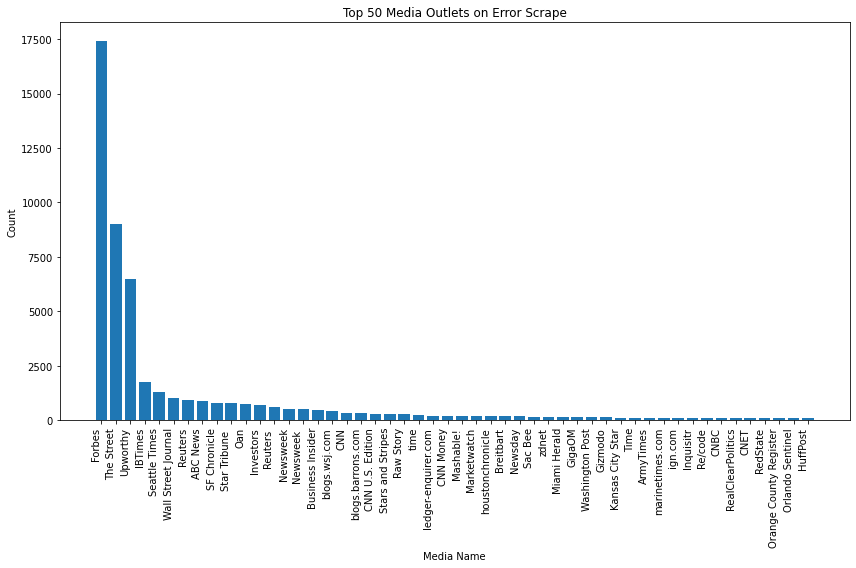

In [34]:
# Get the counts of unique values in the 'media_name' column
value_counts = no_scraped['media_name'].value_counts()

# Select the top 50 values
top_50_values = value_counts.head(50)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plot a bar chart with rotated x-axis labels
plt.bar(top_50_values.index, top_50_values.values)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel('Media Name')
plt.ylabel('Count')
plt.title('Top 50 Media Outlets on Error Scrape')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

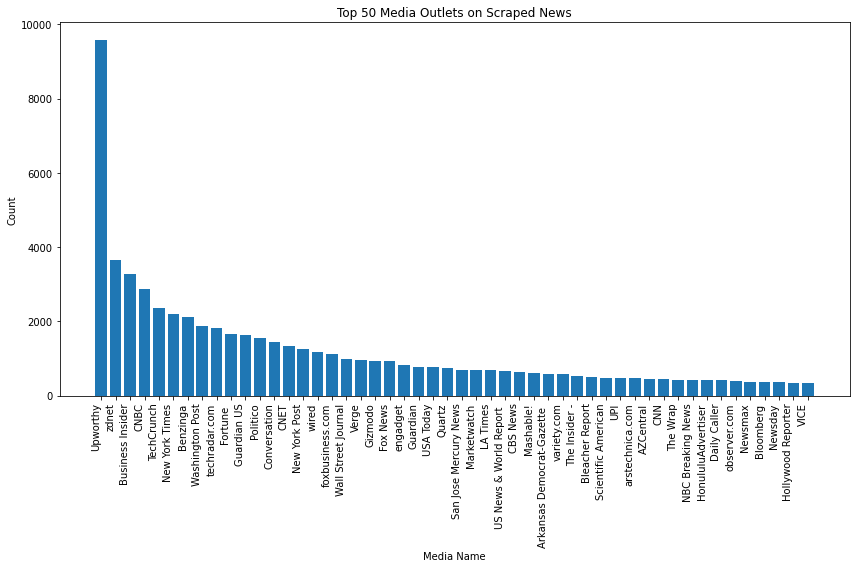

In [35]:
# Get the counts of unique values in the 'media_name' column
value_counts = scraped['media_name'].value_counts()

# Select the top 50 values
top_50_values = value_counts.head(50)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plot a bar chart with rotated x-axis labels
plt.bar(top_50_values.index, top_50_values.values)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel('Media Name')
plt.ylabel('Count')
plt.title('Top 50 Media Outlets on Scraped News')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [46]:
# Count occurrences of each unique value in the 'media_url' column
media_url_counts_na = no_scraped['media_name'].value_counts()
media_url_counts_no_na = scraped['media_name'].value_counts()

In [47]:
# Check if media_url values from media_url_counts_na are present in media_url_counts_no_na
common_media_urls = media_url_counts_na.index[media_url_counts_na.index.isin(media_url_counts_no_na.index)]

# Display common media_urls
print("Common Media URLs:")
len(common_media_urls)

Common Media URLs:


154

In [51]:
# Specify the media_url you want to search for
target_media_url = 'CNN'

# Check if the media_url is in the counts
if target_media_url in media_url_counts_no_na:
    # Retrieve the count for the target media_url
    count_for_target_media_url = media_url_counts_no_na.loc[target_media_url]
    print(f"Count for {target_media_url}: {count_for_target_media_url}")
else:
    print(f"{target_media_url} not found in the counts.")

Count for CNN: 458


In [44]:
media_url_counts_na
media_url_counts_no_na

media_name
Upworthy                9575
zdnet                   3647
Business Insider        3264
CNBC                    2882
TechCrunch              2362
                        ... 
Scout                      1
houstonchronicle           1
creators.com               1
Inquirer                   1
nationalenquirer.com       1
Name: count, Length: 220, dtype: int64

In [58]:
no_scraped.columns

Index(['ID', 'URL', 'Body', 'Error', 'media_id', 'media_name', 'media_url',
       'metadata', 'stories_id', 'story_tags', 'title'],
      dtype='object')

In [66]:
no_scraped.loc[no_scraped['media_name'] == 'Forbes', 'URL'].iloc[6]

'https://www.forbes.com/sites/stevebanker/2021/02/02/kehe-distributors-undergoes-a-digital-transformation/'